# Random Forest Classification Model - Medical No Shows

### Import Dependencies

In [36]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

### Load Dataset for modelling

In [2]:
data = pd.read_csv('../data/cleanData/appointment_dataset_postconsult.csv')
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (93899, 29)


,appointment_id,patient_id,repeat_patient_yn,gender_yn,time_between_sch_appt,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,...,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received,no_show_yn
0,5698125,6.790000e+14,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5698246,5.460000e+13,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,5699393,4.370000e+12,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,5694371,5.450000e+13,0,1,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5698279,6.290000e+13,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [3]:
#check for nulls and verify that attributes for modelling are the correct datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93899 entries, 0 to 93898
Data columns (total 29 columns):
appointment_id                   93899 non-null int64
patient_id                       93899 non-null float64
repeat_patient_yn                93899 non-null int64
gender_yn                        93899 non-null int64
time_between_sch_appt            93899 non-null int64
same_day_appt_yn                 93899 non-null int64
within_week_appt_yn              93899 non-null int64
advanced_appt_yn                 93899 non-null int64
monday_yn                        93899 non-null int64
tuesday_yn                       93899 non-null int64
wednesday_yn                     93899 non-null int64
thursday_yn                      93899 non-null int64
friday_yn                        93899 non-null int64
saturday_yn                      93899 non-null int64
neighborhood_income_lower_yn     93899 non-null int64
neighborhood_income_middle_yn    93899 non-null int64
neigborhood_income_higher

### Drop irrelevent columns

In [4]:
clean_data = data.drop(['appointment_id', 'patient_id', 'time_between_sch_appt'], axis=1)

print(f"Shape of the data is: {clean_data.shape}")

Shape of the data is: (93899, 26)


### Pull our target column from the data and create a list of our outcome values

In [5]:
target = clean_data['no_show_yn']

### Drop the target column from our data 

In [6]:
data = clean_data.drop('no_show_yn', axis=1)
feature_names = data.columns
data.head()

,repeat_patient_yn,gender_yn,same_day_appt_yn,within_week_appt_yn,advanced_appt_yn,monday_yn,tuesday_yn,wednesday_yn,thursday_yn,friday_yn,...,child_yn,young_adult_yn,adult_yn,senior_yn,welfare_assistance,hypertension,diabetes,alcoholism,handicap_yn,sms_received
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Split the data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=3)

### Create a Random Forest Classifier and fit the training data and score with the test data

In [8]:
#Use params from gridsearchCV best param results
rf = RandomForestClassifier(max_depth=10, max_leaf_nodes=None, n_estimators=100, random_state=0)
rf = rf.fit(X_train, y_train)
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.8183005793479495
Testing Data Score: 0.8104366347177849


### Make predictions

In [9]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### View predictions along with their probabilities of being within each class

In [10]:
probs = rf.predict_proba(X_test)
pred_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(Show)": [p[0] for p in probs], 
    "P(Noshow)": [p[1] for p in probs]
    }).reset_index(drop=True)

pred_df.head(10)

,Prediction,Actual,P(Show),P(Noshow)
0,0,0,0.581928,0.418072
1,0,0,0.962051,0.037949
2,0,0,0.960899,0.039101
3,0,0,0.940352,0.059648
4,0,0,0.966186,0.033814
5,0,0,0.715492,0.284508
6,0,0,0.969181,0.030819
7,0,0,0.779276,0.220724
8,0,0,0.928251,0.071749
9,0,0,0.957261,0.042739


### Create a Confusion Matrix

In [11]:
confusion_matrix(y_test,predictions)

array([[19000,    21],
       [ 4429,    25]])

### Label the Confusion Matrix

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 19000   False Pos: 21
False Neg: 4429  True Pos: 25


### Plot Confusion Matrix of test data
Check out matrix of true positives, true negatives, false positives, and false negatives

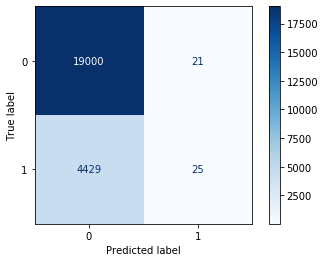

In [13]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, values_format='.5g')

In [14]:
# evaluate the model using model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8104366347177849
Precision: 0.5434782608695652
Recall: 0.005612932195779075


### ROC Curve

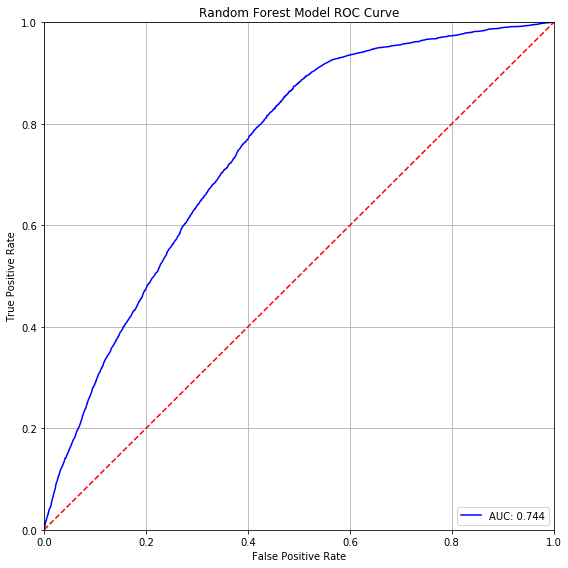

In [48]:
plt.figure(figsize=(8,8))
predictions_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.title('Random Forest Model ROC Curve')
plt.plot(fpr, tpr, 'b', label="AUC: {:.3f}".format(auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.tight_layout()

plt.savefig('ROC_RF.png')

plt.show()


### View features by importance

In [16]:
results = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
results

[(0.37308060685167915, 'same_day_appt_yn'),
 (0.2274592424625938, 'advanced_appt_yn'),
 (0.08824792709448473, 'within_week_appt_yn'),
 (0.045259458720152725, 'sms_received'),
 (0.028657174544619964, 'senior_yn'),
 (0.02860604277218793, 'repeat_patient_yn'),
 (0.0193898190144895, 'gender_yn'),
 (0.015249147081843682, 'welfare_assistance'),
 (0.014679371946771536, 'hypertension'),
 (0.013984595496365198, 'young_adult_yn'),
 (0.013583750902912708, 'neighborhood_income_lower_yn'),
 (0.012632808382427661, 'child_yn'),
 (0.012331139337344922, 'handicap_yn'),
 (0.012144208844246331, 'alcoholism'),
 (0.01190499308370748, 'neigborhood_income_higher_yn'),
 (0.01179022244153371, 'adult_yn'),
 (0.011620435544467275, 'diabetes'),
 (0.010259691686422824, 'monday_yn'),
 (0.008839888466965675, 'neighborhood_income_middle_yn'),
 (0.0087359299865183, 'friday_yn'),
 (0.00863228849031913, 'wednesday_yn'),
 (0.008115515600137733, 'thursday_yn'),
 (0.007676475173189331, 'tuesday_yn'),
 (0.006504276797831949

In [17]:
RFresults_df = pd.DataFrame(results, columns=['feature_importances','feature_names'])
RFresults_df = RFresults_df.sort_values(by='feature_importances', ascending=False)
RFresults_df

,feature_importances,feature_names
0,0.373081,same_day_appt_yn
1,0.227459,advanced_appt_yn
2,0.088248,within_week_appt_yn
3,0.045259,sms_received
4,0.028657,senior_yn
5,0.028606,repeat_patient_yn
6,0.019390,gender_yn
7,0.015249,welfare_assistance
8,0.014679,hypertension
9,0.013985,young_adult_yn


### Export model results to csv

In [18]:
RFresults_df.to_csv('../data/cleanData/modelResults/RFresults_postconsult.csv', index = False, header=True)

In [19]:
RFresults_df=RFresults_df.set_index('feature_names')

RFresults_df

,feature_importances
feature_names,
same_day_appt_yn,0.373081
advanced_appt_yn,0.227459
within_week_appt_yn,0.088248
sms_received,0.045259
senior_yn,0.028657
repeat_patient_yn,0.028606
gender_yn,0.019390
welfare_assistance,0.015249
hypertension,0.014679


### Plot Feature Importance

<Figure size 432x288 with 0 Axes>

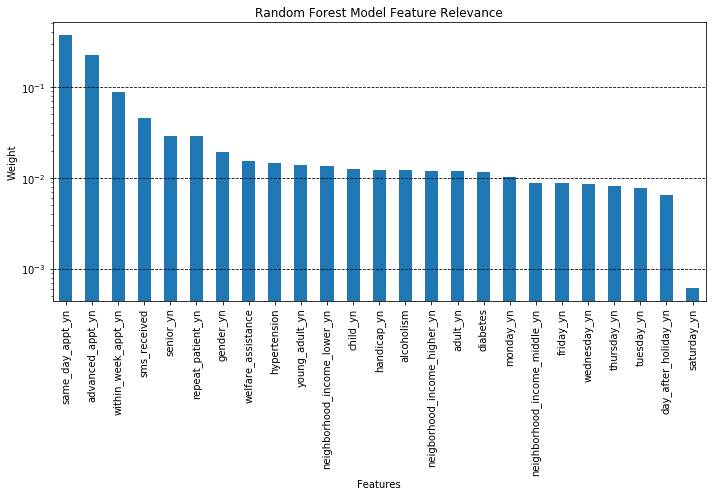

In [47]:
plt.figure()
RFresults_df.plot(kind="bar", legend=False, figsize=(10, 7))
plt.title("Random Forest Model Feature Relevance")
plt.ylabel("Weight")
plt.xlabel("Features")
plt.yscale("log")
plt.grid(axis="y", color="k", linestyle="--")
plt.tight_layout()
plt.savefig("feature_relevance_RF.png")

plt.show()
